# In-Demand Skills for 3 Most Popular Data Roles

Methodology

1. Clean skill column
2. Calculate skill count based on ```job_title_short```
3. Plot initial findings
4. Calculate skill percentage
5. Plot final findings

Original Exploration

[13_Matplotlib_Format_Charts.ipynb](../2_Advanced/13_Matplotlib_Format_Charts.ipynb)

## Import Libraries & Data

In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States']

In [3]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [4]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [5]:
df_skills_count = df_skills_count.reset_index(name = 'skill_count')

df_skills_count.sort_values('skill_count', ascending = False, inplace = True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [13]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

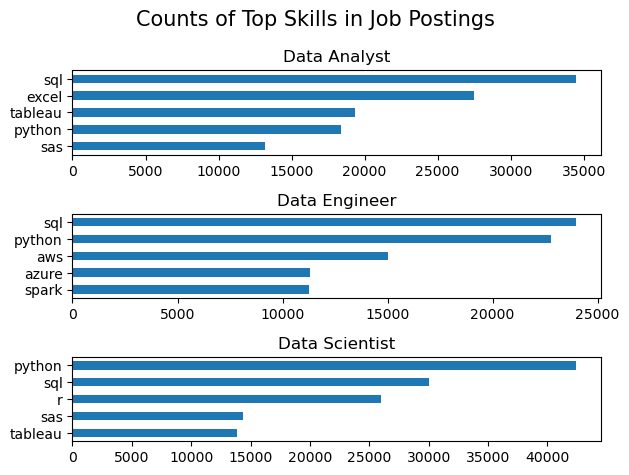

In [21]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, jt in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == jt].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = jt)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    # ax[i].set_xlim(0, 50000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()
plt.show()

In [29]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')

In [31]:
df_merged = pd.merge(df_skills_count, df_job_title_count, 'left', 'job_title_short')

In [ ]:
df_merged

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [ ]:
df_merged['percentage'] = (df_merged['skill_count'] * 100 / df_merged['jobs_total']).round(0)

df_merged

,job_skills,job_title_short,skill_count,jobs_total,percentage
0,python,Data Scientist,42379,58830,72.0
1,sql,Data Analyst,34452,67816,51.0
2,sql,Data Scientist,30034,58830,51.0
3,excel,Data Analyst,27519,67816,41.0
4,r,Data Scientist,26022,58830,44.0
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.0
1866,vb.net,Senior Data Scientist,1,12946,0.0
1867,fortran,Machine Learning Engineer,1,921,0.0
1868,planner,Cloud Engineer,1,423,0.0


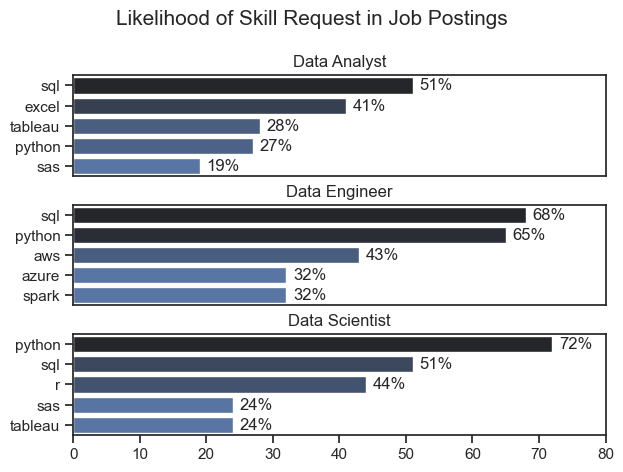

In [74]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, jt in enumerate(job_titles):
    df_plot = df_merged[df_merged['job_title_short'] == jt].head(5)
    sns.barplot(data=df_plot, x='percentage', y='job_skills', ax = ax[i], hue='skill_count', palette='dark:b_r')
 
    ax[i].set_title(jt)
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 80)

    for n, v in enumerate(df_plot['percentage']):
        ax[i].text(v + 1, n, f'{int(v)}%', va = 'center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skill Request in Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)
plt.show()